In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import nltk, re
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anuma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anuma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data = pd.read_csv('../data/raw/data.csv')

print(data.shape)

(422746, 2)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422746 entries, 0 to 422745
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sentence  422746 non-null  object
 1   emotion   422746 non-null  object
dtypes: object(2)
memory usage: 6.5+ MB


In [4]:
data.head()

,sentence,emotion
0,i just feel really helpless and heavy hearted,fear
1,ive enjoyed being able to slouch about relax a...,sad
2,i gave up my internship with the dmrg and am f...,fear
3,i dont know i feel so lost,sad
4,i am a kindergarten teacher and i am thoroughl...,fear


In [5]:
data['sentenceLengths'] = data['sentence'].apply(lambda x : len(x))

In [6]:
texts = data['sentence']
labels = data['emotion']

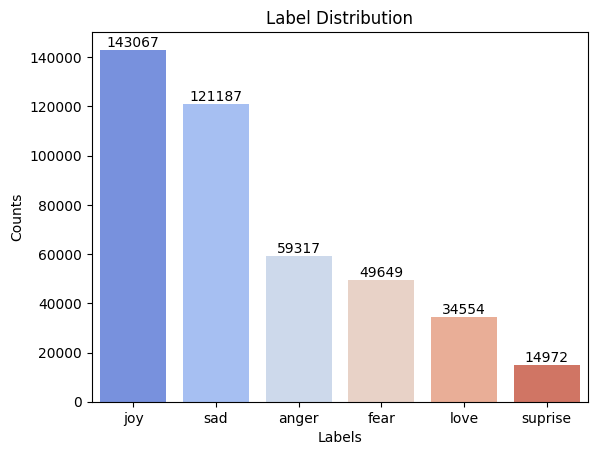

In [7]:
labelCounts = labels.value_counts()
sns.barplot(x = labelCounts.index, y = labelCounts.values, palette='coolwarm')
for i, count in enumerate(labelCounts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Distribution')
plt.show()

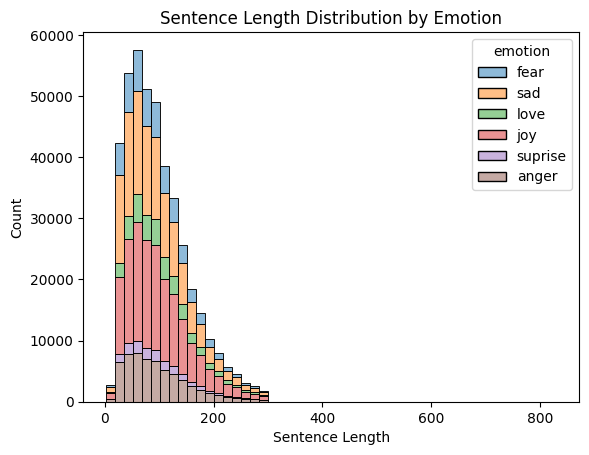

In [8]:
sns.histplot(
    data=data, 
    x='sentenceLengths', 
    hue='emotion', 
    alpha=0.5, 
    bins=50,
    multiple='stack'  
)

plt.xlabel('Sentence Length')
plt.ylabel('Count')
plt.title('Sentence Length Distribution by Emotion')
plt.show()

In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'^[a-zA-Z0-9]', '', text).strip()       # remove extra spaces
    return text

texts = texts.apply(clean_text)
texts[:5]

0          just feel really helpless and heavy hearted
1    ve enjoyed being able to slouch about relax an...
2    gave up my internship with the dmrg and am fee...
3                             dont know i feel so lost
4    am a kindergarten teacher and i am thoroughly ...
Name: sentence, dtype: object

In [10]:
stop_words = set(stopwords.words('english'))

def tokenize(text):
    tokens = word_tokenize(text)
    return [word for word in tokens if word not in stop_words]

tokenized_texts = texts.apply(tokenize)

In [22]:
tokenized_texts[:10]

0             [feel, really, helpless, heavy, hearted]
1    [enjoyed, able, slouch, relax, unwind, frankly...
2        [gave, internship, dmrg, feeling, distraught]
3                             [dont, know, feel, lost]
4    [kindergarten, teacher, thoroughly, weary, job...
5               [beginning, feel, quite, disheartened]
6    [would, think, whomever, would, lucky, enough,...
7    [fear, ever, feel, delicious, excitement, chri...
8            [forever, taking, time, lie, feel, weird]
9    [still, lose, weight, without, feeling, deprived]
Name: sentence, dtype: object

In [16]:
from gensim.models import Word2Vec

SGmodel = Word2Vec(
    sentences=tokenized_texts,
    vector_size=512, # embedding dimension
    window=10, # context window
    min_count=5, # ignore rare words
    sg=1, # 0 = CBOW, 1 = Skip-Gram
    workers=-1,
    epochs = 20
)

CBOWmodel = Word2Vec(
    sentences=tokenized_texts,
    vector_size=1024, # embedding dimension
    window=10, # context window
    min_count=5, # ignore rare words
    sg=0, # 0 = CBOW, 1 = Skip-Gram
    workers=4,
    epochs = 20,
)

SGmodel.save('../models/sg_w2v.model')
CBOWmodel.save('../models/cbow_w2v.model')

In [17]:
vocab_size = len(SGmodel.wv)
vocab_size

22824

-- END --